### Missing values approaches

* Check for Missing data
* Drop NA Values
* MEAN/MEDAIN Imputation
* Random sample imputation

###  Import Data and Required Packages
**Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

**Import the CSV Data as Pandas DataFrame**

In [2]:
df = pd.read_csv('data/output/google_cleaned.csv')

**Show Top 5 Records**

In [3]:
#sample of the data(random_sample)
df.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year,month,day
4871,A-B repeater,VIDEO_PLAYERS,4.4,32,0.239,5000,Free,0.0,Everyone,Video Players & Editors,2018-05-18,1.8,3.0 and up,2018,5,18
6938,BW eServices,BUSINESS,NaN,1,3.800,10,Free,0.0,Everyone,Business,2018-06-05,1.0,4.2 and up,2018,6,5
5113,Ag-Pro Companies,BUSINESS,NaN,0,45.000,50,Free,0.0,Everyone,Business,2018-03-06,2.3.0,4.4 and up,2018,3,6
1377,Couch to 5K by RunDouble,HEALTH_AND_FITNESS,4.7,15674,6.100,1000000,Free,0.0,Everyone,Health & Fitness,2018-07-31,4.5.4,4.1 and up,2018,7,31
6976,City Builder 2016: County Mall,FAMILY,4.2,41693,74.000,1000000,Free,0.0,Everyone,Simulation,2018-06-04,1.0.23,4.0 and up,2018,6,4
2974,FotMob - Live Soccer Scores,SPORTS,4.7,410384,NaN,10000000,Free,0.0,Everyone,Sports,2018-07-31,Varies with device,Varies with device,2018,7,31
2201,DreamWorks Friends,FAMILY,3.6,1042,48.000,100000,Free,0.0,Everyone,Role Playing;Pretend Play,2017-08-04,2.5,4.3 and up,2017,8,4
7950,CV Formats 2018,FAMILY,4.3,374,26.000,100000,Free,0.0,Everyone,Education,2017-10-09,1.0,4.0.3 and up,2017,10,9
7266,Thrive CF,HEALTH_AND_FITNESS,2.2,6,8.000,100,Free,0.0,Everyone,Health & Fitness,2018-01-05,1.0.1,4.3 and up,2018,1,5
7729,Roll Call News,NEWS_AND_MAGAZINES,3.7,24,10.000,5000,Free,0.0,Everyone,News & Magazines,2015-12-24,1.1,4.1 and up,2015,12,24


### 1. Check for Missing data

In [4]:
df.isna().sum().sort_values(ascending=False)

Size              1695
Rating            1474
Current Ver          8
Android Ver          2
Type                 1
App                  0
Category             0
Reviews              0
Installs             0
Price                0
Content Rating       0
Genres               0
Last Updated         0
year                 0
month                0
day                  0
dtype: int64

In [5]:
df.shape[0]

10840

In [6]:
(((df.isna().sum().sort_values(ascending=False)) / df.shape[0]) * 100 ).round(2)

Size              15.64
Rating            13.60
Current Ver        0.07
Android Ver        0.02
Type               0.01
App                0.00
Category           0.00
Reviews            0.00
Installs           0.00
Price              0.00
Content Rating     0.00
Genres             0.00
Last Updated       0.00
year               0.00
month              0.00
day                0.00
dtype: float64

In [7]:
null_values = pd.DataFrame({'Null values': df.isna().sum().sort_values(ascending=False),'percentage null values':(((df.isna().sum().sort_values(ascending=False)) / df.shape[0]) * 100 ).round(2)})
null_values

,Null values,percentage null values
Size,1695,15.64
Rating,1474,13.60
Current Ver,8,0.07
Android Ver,2,0.02
Type,1,0.01
App,0,0.00
Category,0,0.00
Reviews,0,0.00
Installs,0,0.00
Price,0,0.00


#### plotting the null value counts

In [8]:
null_counts = (df.isna().sum().sort_values(ascending=False))/ len(df)
null_counts

Size              0.156365
Rating            0.135978
Current Ver       0.000738
Android Ver       0.000185
Type              0.000092
App               0.000000
Category          0.000000
Reviews           0.000000
Installs          0.000000
Price             0.000000
Content Rating    0.000000
Genres            0.000000
Last Updated      0.000000
year              0.000000
month             0.000000
day               0.000000
dtype: float64

In [9]:
np.arange(len(null_counts))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

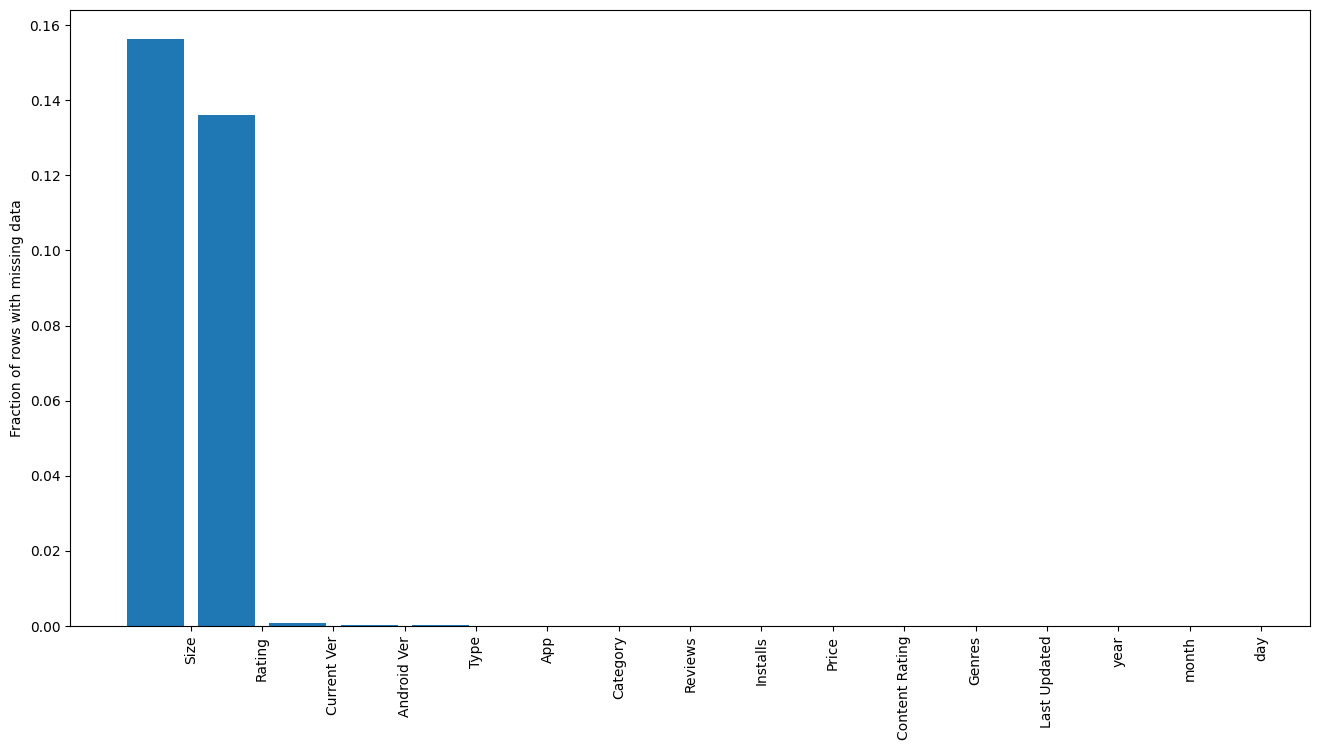

In [10]:
null_counts = df.isna().sum().sort_values(ascending=False)/len(df)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts))+0.5,null_counts.index,rotation='vertical')
plt.ylabel('Fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)
plt.show()

### 2. Drop NA Values

In [11]:
#this is best practice to create a copy of the data
df_copy = df.copy()

In [12]:
df_copy.isna().mean().sort_values(ascending=False)

Size              0.156365
Rating            0.135978
Current Ver       0.000738
Android Ver       0.000185
Type              0.000092
App               0.000000
Category          0.000000
Reviews           0.000000
Installs          0.000000
Price             0.000000
Content Rating    0.000000
Genres            0.000000
Last Updated      0.000000
year              0.000000
month             0.000000
day               0.000000
dtype: float64

In [13]:
cols = [col for col in df_copy.columns if df_copy[col].isna().mean()* 100]
cols

['Rating', 'Size', 'Type', 'Current Ver', 'Android Ver']

In [14]:
df_copy['Size'].isna().sum()

1695

In [15]:
df_copy.isna().mean()

App               0.000000
Category          0.000000
Rating            0.135978
Reviews           0.000000
Size              0.156365
Installs          0.000000
Type              0.000092
Price             0.000000
Content Rating    0.000000
Genres            0.000000
Last Updated      0.000000
Current Ver       0.000738
Android Ver       0.000185
year              0.000000
month             0.000000
day               0.000000
dtype: float64

In [16]:
if df_copy['App'].isnull().mean():
    print('True')
else:
    print('False')

False


## dropping missing values

In [17]:
df.shape

(10840, 16)

In [67]:
drop_df = df[cols].dropna()
drop_df

,Rating,Size,Type,Current Ver,Android Ver
0,4.1,19.000,Free,1.0.0,4.0.3 and up
1,3.9,14.000,Free,2.0.0,4.0.3 and up
2,4.7,8.700,Free,1.2.4,4.0.3 and up
3,4.5,25.000,Free,Varies with device,4.2 and up
4,4.3,2.800,Free,1.1,4.4 and up
...,...,...,...,...,...
10832,4.8,0.619,Free,0.8,2.2 and up
10833,4.0,2.600,Free,1.0.0,4.1 and up
10835,4.5,53.000,Free,1.48,4.1 and up
10836,5.0,3.600,Free,1.0,4.1 and up


In [68]:
drop_df.shape

(7723, 5)

In [72]:
df.shape, drop_df.shape

((10840, 16), (7723, 5))

<Axes: ylabel='Density'>

<Figure size 640x480 with 0 Axes>

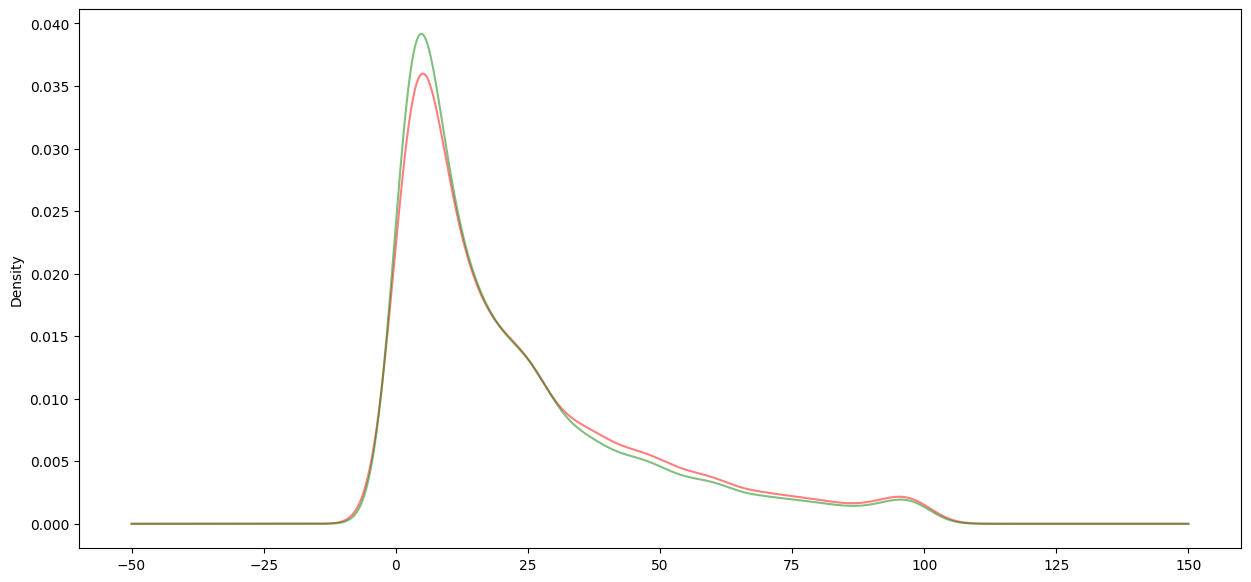

In [75]:
fig= plt.figure()

# density plot using seaborn library
fig, axs = plt.subplots(1, 1, figsize=(15, 7))

drop_df['Size'].plot.density(color='red',alpha=0.5,label='Size')
df['Size'].plot.density(color='green',alpha=0.5,label='Size')

<Figure size 640x480 with 0 Axes>

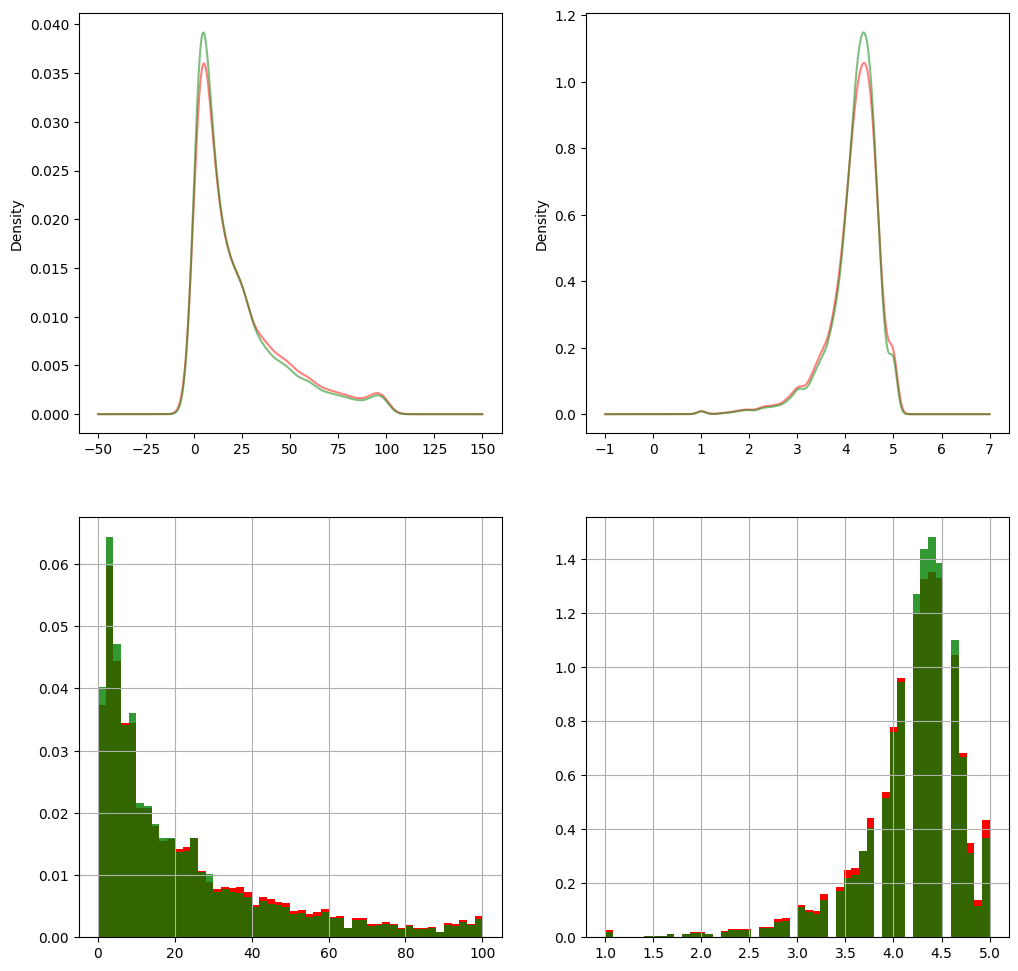

In [76]:
fig= plt.figure()

# density plot using seaborn library
fig, axs = plt.subplots(2, 2, figsize=(15, 7))

drop_df['Size'].plot.density(color='red',ax=axs[0, 0],alpha=0.5,label='Size')
df['Size'].plot.density(color='green',ax=axs[0, 0],alpha=0.5,label='Size')
drop_df['Rating'].plot.density(color='red',ax=axs[0, 1],alpha=0.5,label='Rating')
df['Rating'].plot.density(color='green',ax=axs[0, 1],alpha=0.5,label='Rating')
drop_df['Size'].hist(bins=50,ax=axs[1, 0],density=True,figsize=(12,12),color='red')
df['Size'].hist(bins=50,ax=axs[1, 0],density=True,figsize=(12,12),color='green', alpha=0.8)
drop_df['Rating'].hist(bins=50,ax=axs[1, 1],density=True,figsize=(12,12),color='red')
df['Rating'].hist(bins=50,ax=axs[1, 1],density=True,figsize=(12,12),color='green', alpha=0.8)

plt.show()

#### Insights
-As we can observe from above plots
- Drop NA Technique is changing our distribution pattern
- So we reject Drop NA Technique

In [77]:
### 3. MEAN/MEDAIN Imputation

In [18]:
df_copy_me_mo = df.copy()

In [20]:
df_copy_me_mo[df_copy_me_mo['Size'].isnull()]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year,month,day
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,NaN,5000000,Free,0.0,Everyone,Art & Design,2018-07-14,Varies with device,2.3.3 and up,2018,7,14
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,NaN,10000000,Free,0.0,Everyone,Art & Design,2018-07-30,Varies with device,Varies with device,2018,7,30
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,NaN,1000000,Free,0.0,Everyone,Auto & Vehicles,2018-07-30,Varies with device,Varies with device,2018,7,30
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,NaN,5000000,Free,0.0,Everyone,Auto & Vehicles,2018-07-30,Varies with device,Varies with device,2018,7,30
68,REPUVE,AUTO_AND_VEHICLES,3.9,356,NaN,100000,Free,0.0,Everyone,Auto & Vehicles,2018-05-25,Varies with device,Varies with device,2018,5,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10712,My Earthquake Alerts - US & Worldwide Earthquakes,WEATHER,4.4,3471,NaN,100000,Free,0.0,Everyone,Weather,2018-07-24,Varies with device,Varies with device,2018,7,24
10724,Posta App,MAPS_AND_NAVIGATION,3.6,8,NaN,1000,Free,0.0,Everyone,Maps & Navigation,2017-09-27,Varies with device,4.4 and up,2017,9,27
10764,Chat For Strangers - Video Chat,SOCIAL,3.4,622,NaN,100000,Free,0.0,Mature 17+,Social,2018-05-23,Varies with device,Varies with device,2018,5,23
10825,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,NaN,5000000,Free,0.0,Mature 17+,Social,2018-03-23,Varies with device,Varies with device,2018,3,23


In [21]:
df_copy_me_mo['Size'].mean()

21.506534062329145

In [23]:
df_copy_me_mo['Size'].fillna(df_copy_me_mo['Size'].mean())

0        19.000000
1        14.000000
2         8.700000
3        25.000000
4         2.800000
           ...    
10835    53.000000
10836     3.600000
10837     9.500000
10838    21.506534
10839    19.000000
Name: Size, Length: 10840, dtype: float64

In [24]:
df_copy_me_mo['mean_Size'] = df_copy_me_mo['Size'].fillna(df_copy_me_mo['Size'].mean())
df_copy_me_mo['median_Size'] = df_copy_me_mo['Size'].fillna(df_copy_me_mo['Size'].median())
df_copy_me_mo['mean_Rating'] = df_copy_me_mo['Rating'].fillna(df_copy_me_mo['Rating'].mean())
df_copy_me_mo['median_Rating'] = df_copy_me_mo['Rating'].fillna(df_copy_me_mo['Rating'].median())

In [25]:
print('Original Size Variance', df_copy_me_mo['Size'].var())

Original Size Variance 510.5801557864873


In [26]:
print('Size Variance After mean imputation', df_copy_me_mo['mean_Size'].var())

Size Variance After mean imputation 430.73576386305376


In [27]:
print('Size Variance After median imputation', df_copy_me_mo['median_Size'].var())

Size Variance After median imputation 440.28217654605027


## mean will be a good option, as less variance


In [28]:
print('Original Rating Variance', df_copy_me_mo['Rating'].var())
print('Rating Variance After mean imputation', df_copy_me_mo['mean_Rating'].var())
print('Rating Variance After median imputation', df_copy_me_mo['median_Rating'].var())

Original Rating Variance 0.2654504722754168
Rating Variance After mean imputation 0.22935175503822108
Rating Variance After median imputation 0.23072842363353055


#### Insights
- As we can observe Variance is distorted after both mean and median imputation

<Axes: ylabel='Density'>

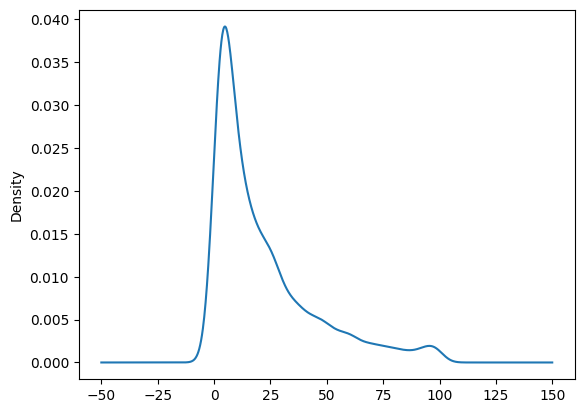

In [29]:
df_copy_me_mo['Size'].plot.density()

<Axes: ylabel='Density'>

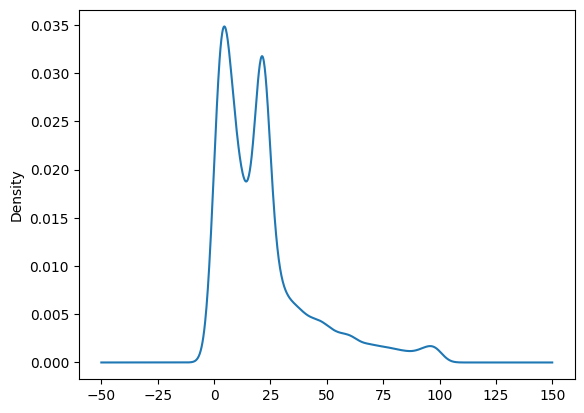

In [30]:
df_copy_me_mo['mean_Size'].plot.density()

<Axes: ylabel='Density'>

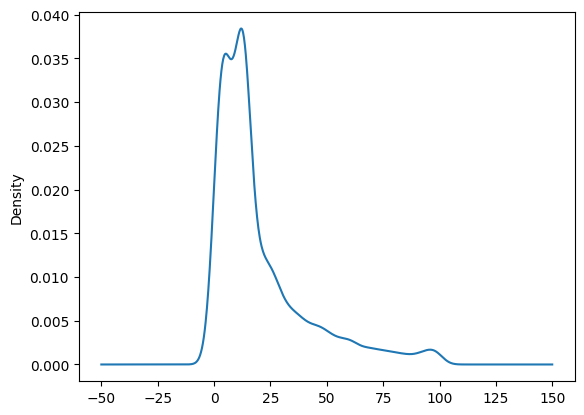

In [31]:
df_copy_me_mo['median_Size'].plot.density()

<Figure size 640x480 with 0 Axes>

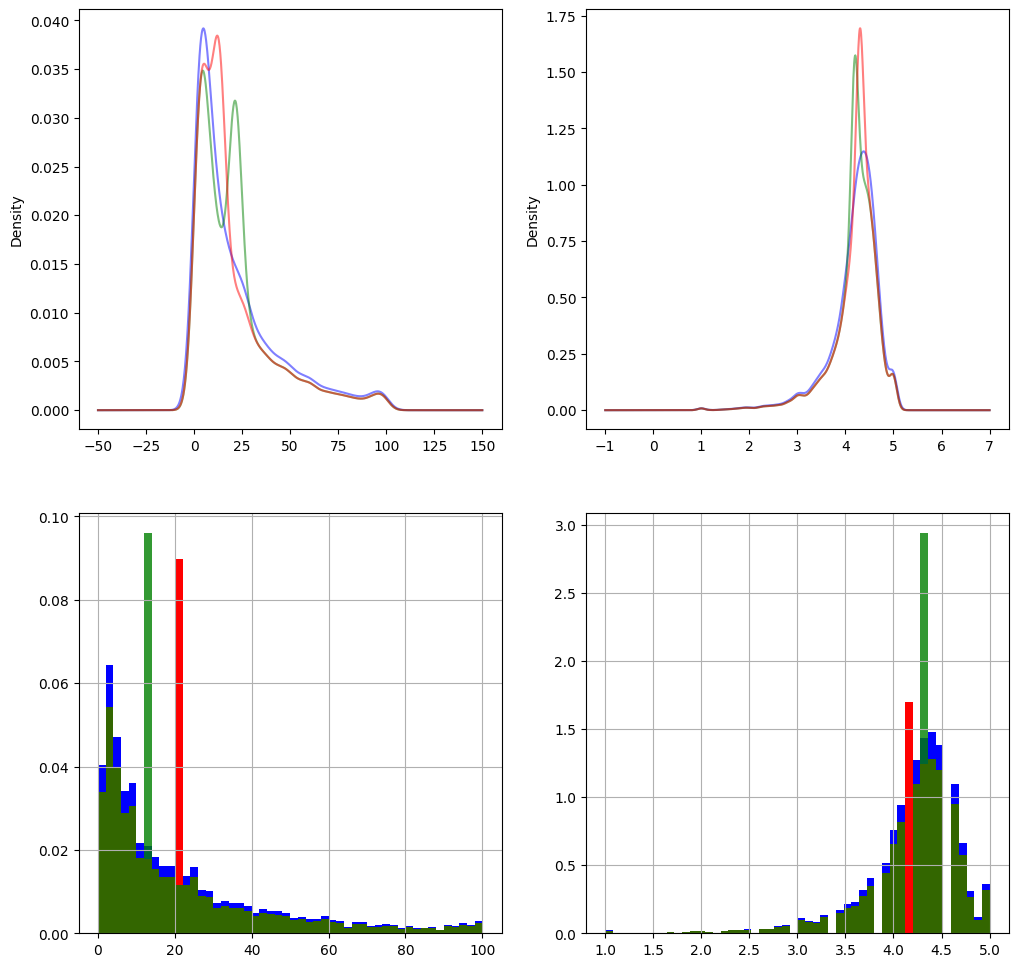

In [32]:
fig= plt.figure()

# density plot using seaborn library
fig, axs = plt.subplots(2, 2, figsize=(15, 7))

df_copy_me_mo['Size'].plot.density(color='blue',ax=axs[0, 0],alpha=0.5,label='Size')
df_copy_me_mo['mean_Size'].plot.density(color='green',ax=axs[0, 0],alpha=0.5,label='mean_Size')
df_copy_me_mo['median_Size'].plot.density(color='red',ax=axs[0, 0],alpha=0.5,label='median_Size')

df_copy_me_mo['Rating'].plot.density(color='blue',ax=axs[0, 1],alpha=0.5,label='Rating')
df_copy_me_mo['mean_Rating'].plot.density(color='green',ax=axs[0, 1],alpha=0.5,label='mean_Rating')
df_copy_me_mo['median_Rating'].plot.density(color='red',ax=axs[0, 1],alpha=0.5,label='median_Rating')

df_copy_me_mo['Size'].hist(bins=50,ax=axs[1, 0],density=True,figsize=(12,12),color='blue')
df_copy_me_mo['mean_Size'].hist(bins=50,ax=axs[1, 0],density=True,figsize=(12,12),color='red')
df_copy_me_mo['median_Size'].hist(bins=50,ax=axs[1, 0],density=True,figsize=(12,12),color='green', alpha=0.8)

df_copy_me_mo['Rating'].hist(bins=50,ax=axs[1, 1],density=True,figsize=(12,12),color='blue')
df_copy_me_mo['mean_Rating'].hist(bins=50,ax=axs[1, 1],density=True,figsize=(12,12),color='red')
df_copy_me_mo['median_Rating'].hist(bins=50,ax=axs[1, 1],density=True,figsize=(12,12),color='green', alpha=0.8)


plt.show()

#### Insights
-As we can observe from above plots
- Mean and median imputation Technique is changing our distribution pattern.
- So we will reject mean and median imputation Technique also.

### 4. Random Sample Imputation

In [83]:
df_random = df.copy()

In [84]:
df_random['Size'].dropna().sample(20)

1898     75.0
9117      6.8
5020     27.0
4400     28.0
5358     22.0
7037      5.4
5661      8.2
2709     21.0
7967      7.1
3569     61.0
7041      8.2
8285     18.0
5332      8.5
8109      5.0
9307      3.7
4619      4.9
3618     37.0
10767    24.0
8697      5.4
5361      2.0
Name: Size, dtype: float64

In [85]:
def Random_Sample_imputation(feature):
    random_sample=df_random[feature].dropna().sample(df_random[feature].isnull().sum())               
    random_sample.index=df_random[df_random[feature].isnull()].index
    df_random.loc[df_random[feature].isnull(),feature]=random_sample

In [86]:
# checking columns for null values
[col for col in df_random.columns if df_random[col].isnull().mean()]

['Rating', 'Size', 'Type', 'Current Ver', 'Android Ver']

In [87]:
for col in df_random:
    Random_Sample_imputation(col)

In [88]:
df_random.isna().sum().sum()

0

In [89]:
df_random['Size'].var()

510.60101518413444

In [90]:
print('Original Size Variance', df['Size'].var())
print('Size Variance After Random imputation', df_random['Size'].var())

Original Size Variance 510.5801557864873
Size Variance After Random imputation 510.60101518413444


In [91]:
print('Original Size Variance', df['Rating'].var())
print('Size Variance After Rating imputation', df_random['Rating'].var())

Original Size Variance 0.2654504722754168
Size Variance After Rating imputation 0.2622135004999372


<Figure size 640x480 with 0 Axes>

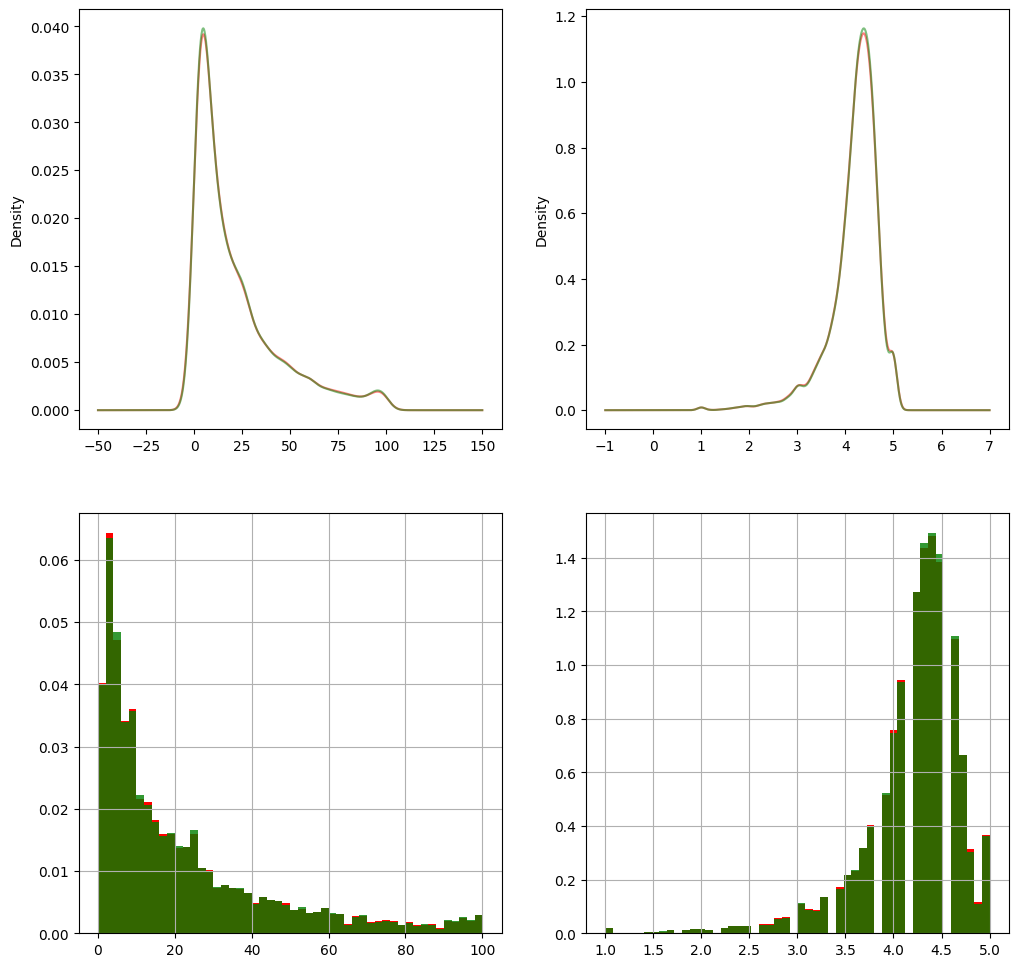

In [92]:
fig= plt.figure()

# density plot using seaborn library
fig, axs = plt.subplots(2, 2, figsize=(15, 7))

df['Size'].plot.density(color='red',ax=axs[0, 0],alpha=0.5,label='Size')
df_random['Size'].plot.density(color='green',ax=axs[0, 0],alpha=0.5,label='Size')
df['Rating'].plot.density(color='red',ax=axs[0, 1],alpha=0.5,label='Rating')
df_random['Rating'].plot.density(color='green',ax=axs[0, 1],alpha=0.5,label='Rating')
df['Size'].hist(bins=50,ax=axs[1, 0],density=True,figsize=(12,12),color='red')
df_random['Size'].hist(bins=50,ax=axs[1, 0],density=True,figsize=(12,12),color='green', alpha=0.8)
df['Rating'].hist(bins=50,ax=axs[1, 1],density=True,figsize=(12,12),color='red')
df_random['Rating'].hist(bins=50,ax=axs[1, 1],density=True,figsize=(12,12),color='green', alpha=0.8)

plt.show()

In [93]:
null_df = pd.DataFrame({'Null Values' : df_random.isna().sum().sort_values(ascending=False), 'Percentage Null Values' : (df_random.isna().sum().sort_values(ascending=False)) / (df_random.shape[0]) * (100)})
null_df

,Null Values,Percentage Null Values
App,0,0.0
Category,0,0.0
Rating,0,0.0
Reviews,0,0.0
Size,0,0.0
Installs,0,0.0
Type,0,0.0
Price,0,0.0
Content Rating,0,0.0
Genres,0,0.0


#### Insights
-As we can observe from above plots
- Random Sample imputation Technique has no impact on distribution pattern.
- So we will accept Random Sample imputation Technique .

In [94]:
num_features=[col for col in df_random.columns if df_random[col].dtype!='O']
num_df = df_random[num_features]
num_df.head()

,Rating,Reviews,Size,Installs,Price,year,month,day
0,4.1,159,19.0,10000,0.0,2018,1,7
1,3.9,967,14.0,500000,0.0,2018,1,15
2,4.7,87510,8.7,5000000,0.0,2018,8,1
3,4.5,215644,25.0,50000000,0.0,2018,6,8
4,4.3,967,2.8,100000,0.0,2018,6,20


In [95]:
df_random.to_csv('data/output/google_missing_imputed.csv', index = False)